# Ravens Draft and Season Statistics Analysis

### *By: Christopher Tang* 

## Table of Contents

1. [Introduction](#introduction)
2. [Necessary Imports](#necessary-imports)
3. [Ravens Team Statistics](#3-ravens-team-statistics-data)
4. [Ravens Draft Statistics](#4-ravens-draft-statistics-data)
5. [Combining Data Sets](#5-combining-data-sets)
6. [Plotting Data](#6-plotting-data)
7. [Player Spending Analysis](#7-player-spending-analysis)

## 1. Introduction
The Baltimore Ravens are home to some of the most influential football players in history. They have a rich history with many ups and downs. This tutorial will walk through an analysis of historic season score and draft data analyzing which players have been the most influential in seasons directly after being drafted as well as which players have been overpaid for their contributions to the team.

### All Data Comes From These Sources:
- [Ravens Season Statistics](https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023?resource=download)
- [Ravens Drafts](https://www.spotrac.com/nfl/baltimore-ravens/draft/2003-2023/)

## 2. Necessary Imports

In order to follow along with the tutorial, it is required that you have at least Python 3. It is recommended that you have Python 3.9, as that is one of the more recent releases of Python that will function for this tutorial.

The following Python libraries are also required:

In [13]:
import pandas as pd 
import numpy as np 

#To Read From Draft Website
import requests
from bs4 import BeautifulSoup
import urllib.request
from urllib.request import urlopen

#For ReadHTML
import io
from io import StringIO

#For Plotting
import matplotlib.pyplot as plt

#Potential dependency 'pip3 install lxml'


## 3. Ravens Team Statistics Data

The team statistics data is stored as a .csv file saved in this repository downloaded from the [Kaggle](https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023?resource=download) webpage. 

Both datasets will be saved into Pandas DataFrames.

### Data Collection

In [14]:
data = pd.read_csv('team_stats_2003_2023.csv')
data

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2023,Carolina Panthers,2,15,0.118,236,416,-180,-10.6,17,...,7,4.0,111,103,845,36,25.0,11.1,-135.03,NaN
668,2023,San Francisco 49ers,12,5,0.706,491,298,193,11.4,17,...,27,4.8,147,101,933,29,45.3,10.1,231.48,NaN
669,2023,Los Angeles Rams,10,7,0.588,404,377,27,1.6,17,...,18,4.3,110,89,720,35,41.1,9.2,133.32,NaN
670,2023,Seattle Seahawks,9,8,0.529,364,402,-38,-2.2,17,...,11,4.1,93,111,954,35,38.8,8.4,62.33,NaN


### Data Processing: Cleaning

In order to best analyze this data we will need to first clean the DataFrame. The first step we will take is renaming the columns into clearer and more readable headers for our analysis. Additionally, we will drop many columns that are not necessarily pertinent to our analysis

In [15]:

data.rename(columns={'year':'Year', 'team':'Team', 'wins':'Wins', 'losses':'Losses', 'win_loss_perc':'Win_Perc', 'points':'Points', 'points_opp':'Points_Against', 'points_diff':'Point_Diff', 'mov':'MOV', 'g':'Games_Played', 'ties':'Ties'}, inplace=True)
keep_columns = ['Year','Team','Wins','Losses','Win_Perc','Points','Points_Against','Point_Diff','MOV','Games_Played']
data = data[data.columns.intersection(keep_columns)]
data



,Year,Team,Wins,Losses,Win_Perc,Points,Points_Against,Point_Diff,MOV,Games_Played
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16
...,...,...,...,...,...,...,...,...,...,...
667,2023,Carolina Panthers,2,15,0.118,236,416,-180,-10.6,17
668,2023,San Francisco 49ers,12,5,0.706,491,298,193,11.4,17
669,2023,Los Angeles Rams,10,7,0.588,404,377,27,1.6,17
670,2023,Seattle Seahawks,9,8,0.529,364,402,-38,-2.2,17


As you can most likely see, the DataFrame contains data from all teams in the National Football League and as such contains many unnecessary data points. In order to fix this issue we will drop and rows not representing the Baltimore Ravens and then reindex the DataFrame accordingly. Additionally we must calculate a new column standardizing the points difference statistic as there were multiple seasons were the Ravens played sixteen games and some where they played seventeen. 

In [16]:
ravens = data[data['Team'] == 'Baltimore Ravens'] #Create a New Dataframe with Only Ravens
ravens.index = range(len(ravens)) #Correcting Indexes After Dropping Other Teams
ravens["Standard_Point_Diff"] = ravens["Point_Diff"]/ravens["Games_Played"]
ravens

/var/folders/9s/ggfkysn56kbfbtkmshxsbh0h0000gn/T/ipykernel_167/3333661388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ravens["Standard_Point_Diff"] = ravens["Point_Diff"]/ravens["Games_Played"]


,Year,Team,Wins,Losses,Win_Perc,Points,Points_Against,Point_Diff,MOV,Games_Played,Standard_Point_Diff
0,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,6.875000
1,2004,Baltimore Ravens,9,7,0.563,317,268,49,3.1,16,3.062500
2,2005,Baltimore Ravens,6,10,0.375,265,299,-34,-2.1,16,-2.125000
3,2006,Baltimore Ravens,13,3,0.813,353,201,152,9.5,16,9.500000
4,2007,Baltimore Ravens,5,11,0.313,275,384,-109,-6.8,16,-6.812500
5,2008,Baltimore Ravens,11,5,0.688,385,244,141,NaN,16,8.812500
6,2009,Baltimore Ravens,9,7,0.563,391,261,130,8.1,16,8.125000
7,2010,Baltimore Ravens,12,4,0.750,357,270,87,5.4,16,5.437500
8,2011,Baltimore Ravens,12,4,0.750,378,266,112,7.0,16,7.000000
9,2012,Baltimore Ravens,10,6,0.625,398,344,54,NaN,16,3.375000


Finally, we will drop the columns previously used for calculations leving only Year, Win_Perc, and Standard_Point_Diff. From the resulting DataFrame we can calculate the change in both the Win_Perc and Standard_Point_Diff per season.

In [17]:
scores = ravens[['Year','Win_Perc','Standard_Point_Diff']]
scores['Point_Diff_Change'] = scores['Standard_Point_Diff'].diff(periods=1)
scores['Win_Perc_Change'] = scores['Win_Perc'].diff(periods=1)
scores

/var/folders/9s/ggfkysn56kbfbtkmshxsbh0h0000gn/T/ipykernel_167/4112222518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores['Point_Diff_Change'] = scores['Standard_Point_Diff'].diff(periods=1)
/var/folders/9s/ggfkysn56kbfbtkmshxsbh0h0000gn/T/ipykernel_167/4112222518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores['Win_Perc_Change'] = scores['Win_Perc'].diff(periods=1)


,Year,Win_Perc,Standard_Point_Diff,Point_Diff_Change,Win_Perc_Change
0,2003,0.625,6.875000,NaN,NaN
1,2004,0.563,3.062500,-3.812500,-0.062
2,2005,0.375,-2.125000,-5.187500,-0.188
3,2006,0.813,9.500000,11.625000,0.438
4,2007,0.313,-6.812500,-16.312500,-0.500
5,2008,0.688,8.812500,15.625000,0.375
6,2009,0.563,8.125000,-0.687500,-0.125
7,2010,0.750,5.437500,-2.687500,0.187
8,2011,0.750,7.000000,1.562500,0.000
9,2012,0.625,3.375000,-3.625000,-0.125


## 4. Ravens Draft Statistics Data

The Ravens draft data will be scraped from the [Spotrac](https://www.spotrac.com/nfl/baltimore-ravens/draft/2003-2023/) webpage.

### Data Collection: Scraping

In order to scrape the ravens draft data from the webpage we will be utilizing the requests and BeautifulSoup libraries.

In [18]:
res = requests.get('https://www.spotrac.com/nfl/baltimore-ravens/draft/2004-2023/')
root = BeautifulSoup(res.content)
url = res.url
html = urlopen(url).read()
soup = BeautifulSoup(html,"html.parser")
table = soup.find('table')
player_tbl = pd.read_html(io.StringIO(str(table)))
player_df = pd.DataFrame(player_tbl[0])

player_df = player_df[player_df['Player'].notna()]
player_df.rename(columns={'Rookie Contract':'Rookie_Contract'}, inplace=True)
player_df.sort_values(by='Year', inplace=True)
player_df = player_df[['Player','Year','Round','Pick','Rookie_Contract']]
player_df.index = range(len(player_df))
player_df.to_csv('ravens_player_drafts.csv')
player_df


,Player,Year,Round,Pick,Rookie_Contract
0,Brian Rimpf,2004,7,246,"3 yrs, $944,070"
1,Dwan Edwards,2004,2,51,"5 yrs, $3,545,000"
2,Devard Darling,2004,3,82,"3 yrs, $1,415,000"
3,Derek Abney,2004,7,244,"3 yrs, $945,000"
4,Josh Harris,2004,6,187,"3 yrs, $982,000"
...,...,...,...,...,...
167,Malaesala Aumavae-Laulu,2023,6,199,"4 yrs, $4,013,192"
168,Kyu Blu Kelly,2023,5,157,"4 yrs, $4,149,144"
169,Tavius Robinson,2023,4,124,"4 yrs, $4,560,564"
170,Trenton Simpson,2023,3,86,"4 yrs, $5,408,845"


In order to analyze how much each player has cost the Baltimore Ravens, we will need to analyze the Rookie_Contract column. We will split the column into two seperate items, contract duration (Contract_Years) and the amount paid for the contract (Contract_Price)

In [19]:
player_df['Contract_Years'] = player_df['Rookie_Contract'].apply(lambda x: x[0:x.index(" ")])
player_df['Contract_Price'] = player_df['Rookie_Contract'].apply(lambda x: int(x[x.index("$")+1:].replace(',','')))
player_df.drop(columns=['Rookie_Contract'])
player_df

,Player,Year,Round,Pick,Rookie_Contract,Contract_Years,Contract_Price
0,Brian Rimpf,2004,7,246,"3 yrs, $944,070",3,944070
1,Dwan Edwards,2004,2,51,"5 yrs, $3,545,000",5,3545000
2,Devard Darling,2004,3,82,"3 yrs, $1,415,000",3,1415000
3,Derek Abney,2004,7,244,"3 yrs, $945,000",3,945000
4,Josh Harris,2004,6,187,"3 yrs, $982,000",3,982000
...,...,...,...,...,...,...,...
167,Malaesala Aumavae-Laulu,2023,6,199,"4 yrs, $4,013,192",4,4013192
168,Kyu Blu Kelly,2023,5,157,"4 yrs, $4,149,144",4,4149144
169,Tavius Robinson,2023,4,124,"4 yrs, $4,560,564",4,4560564
170,Trenton Simpson,2023,3,86,"4 yrs, $5,408,845",4,5408845


## 5. Combining Data Sets

In [20]:
combined = pd.merge(scores,player_df,on='Year')
combined.drop(['Rookie_Contract'],axis=1,inplace=True)

#This calculates the number of points changed per million dollar spent on the player
combined['Point_Change_By_Price'] = (combined['Point_Diff_Change']/combined['Contract_Price'])*1000000

combined


,Year,Win_Perc,Standard_Point_Diff,Point_Diff_Change,Win_Perc_Change,Player,Round,Pick,Contract_Years,Contract_Price,Point_Change_By_Price
0,2004,0.563,3.062500,-3.812500,-0.062,Brian Rimpf,7,246,3,944070,-4.038366
1,2004,0.563,3.062500,-3.812500,-0.062,Dwan Edwards,2,51,5,3545000,-1.075458
2,2004,0.563,3.062500,-3.812500,-0.062,Devard Darling,3,82,3,1415000,-2.694346
3,2004,0.563,3.062500,-3.812500,-0.062,Derek Abney,7,244,3,945000,-4.034392
4,2004,0.563,3.062500,-3.812500,-0.062,Josh Harris,6,187,3,982000,-3.882383
...,...,...,...,...,...,...,...,...,...,...,...
167,2023,0.765,11.941176,9.882353,0.177,Malaesala Aumavae-Laulu,6,199,4,4013192,2.462467
168,2023,0.765,11.941176,9.882353,0.177,Kyu Blu Kelly,5,157,4,4149144,2.381781
169,2023,0.765,11.941176,9.882353,0.177,Tavius Robinson,4,124,4,4560564,2.166915
170,2023,0.765,11.941176,9.882353,0.177,Trenton Simpson,3,86,4,5408845,1.827073


## 6. Plotting Data

In order to analyze the combined data set, it is necessary to plot various aspects of the data to make comparisons. First we will plot Win Percentage by Season to see how often the Ravens won in a given year. For all of the following plots we will be using the "matplotlib" Library to make comprehensive visuals. 

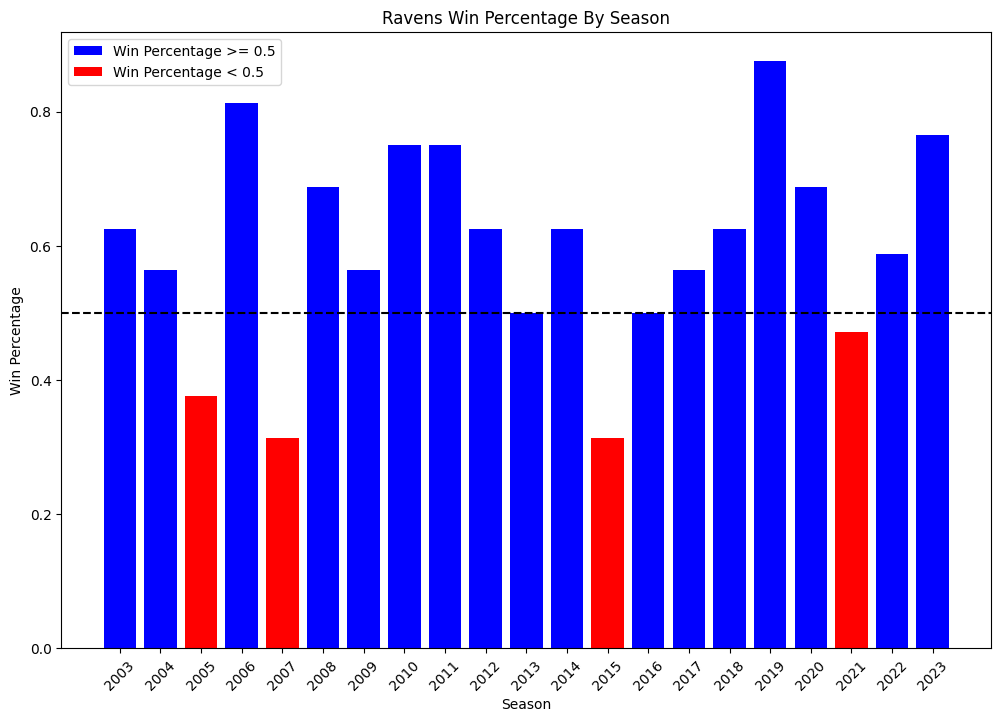

In [21]:
pltAbove = scores[scores['Win_Perc'] >= 0.5]
pltBel = scores[scores['Win_Perc'] < 0.5]

plt.figure(figsize=(12,8))
plt.bar(pltAbove.Year,pltAbove.Win_Perc,color='b')
plt.bar(pltBel.Year,pltBel.Win_Perc,color='r')
#plt.plot(scores.Year,scores.Win_Perc_Change,color='r')
dates = scores.Year.unique()
plt.xticks(dates[::1],rotation=45)
plt.title('Ravens Win Percentage By Season')
plt.xlabel('Season')
plt.ylabel('Win Percentage')
plt.legend(['Win Percentage >= 0.5','Win Percentage < 0.5'])
plt.axhline(y = 0.5, color = 'k', linestyle = '--') 

plt.show()

From this graph it can be demonstrated that the Ravens had a win percentage over 50% for majority of the seasons between 2003 and 2023. Aside from overall wins it is also important to analyze how many points the Ravens scored in a given season compared to how many points other teams scored against the Ravens. To do this we will look at and plot the Standard_Point_Diff column calculated earlier. 

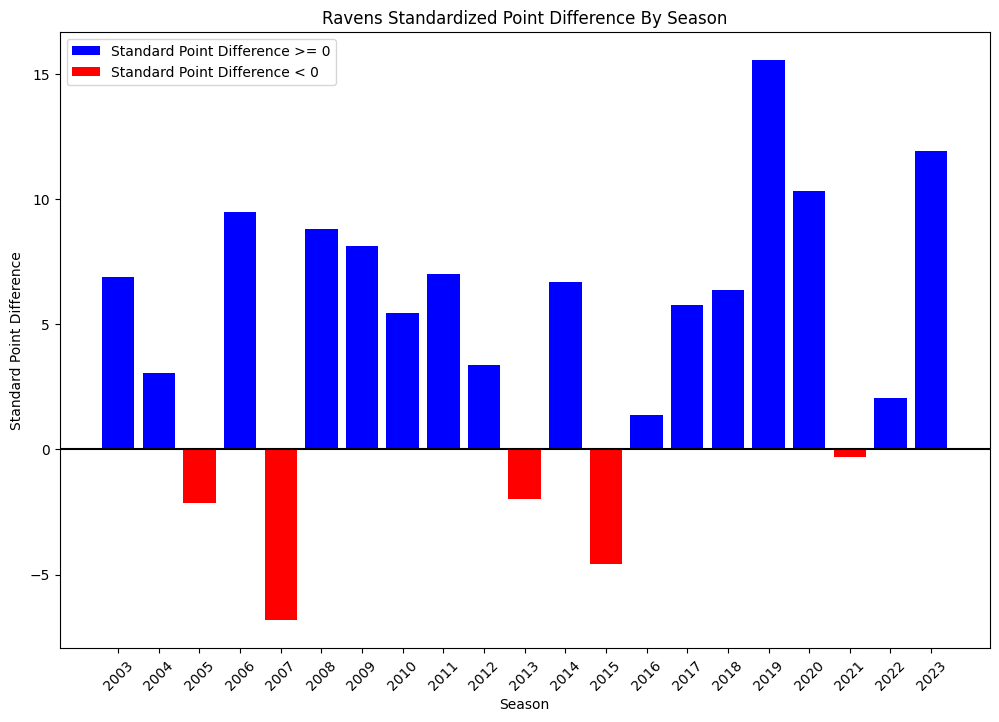

In [22]:
pltAbove = scores[scores['Standard_Point_Diff'] >= 0]
pltBel = scores[scores['Standard_Point_Diff'] < 0]

plt.figure(figsize=(12,8))
plt.bar(pltAbove.Year,pltAbove.Standard_Point_Diff,color='b')
plt.bar(pltBel.Year,pltBel.Standard_Point_Diff,color='r')
dates = scores.Year.unique()
plt.xticks(dates[::1],rotation=45)
plt.title('Ravens Standardized Point Difference By Season')
plt.xlabel('Season')
plt.ylabel('Standard Point Difference')
plt.legend(['Standard Point Difference >= 0','Standard Point Difference < 0'])
plt.axhline(y = 0, color = 'k', linestyle = '-') 
plt.show()

What is interesting to note here is that there is one season (2013) in which the Ravens win percentage is greater than or equal to 50% while still having a negative Standardized Points Difference. This indicates that in this season games where the Ravens won were closer in scores than those in which the Ravens lost. Finally, we should plot an analysis of how Ravens draft spending compares to win percentages in a given season.

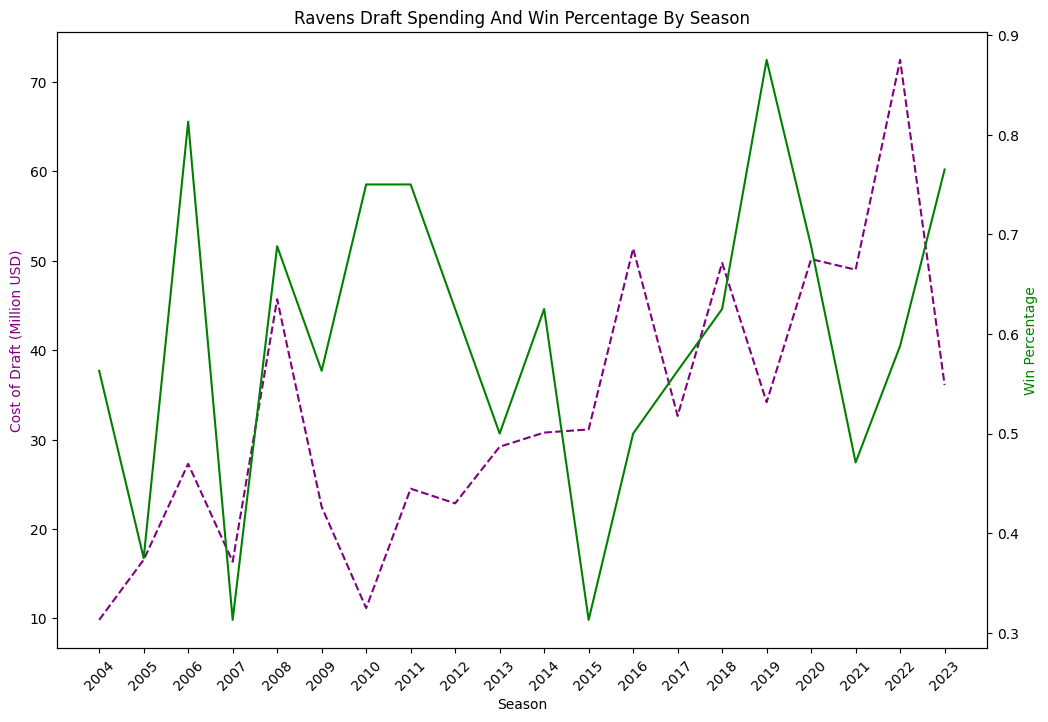

In [23]:
years = combined.Year.unique()
arr = []
arr2 = []
for year in years:
    curr = combined[combined['Year']==year]
    arr.append(curr['Contract_Price'].sum()/1000000)
    arr2.append(curr['Win_Perc'].unique())


plt.figure(figsize=(12,8))
plt.plot(years,arr,linestyle='dashed', color="purple")
plt.xticks(years[::1],rotation=45)  
plt.title('Ravens Draft Spending And Win Percentage By Season')
plt.xlabel('Season')
plt.ylabel('Cost of Draft (Million USD)',color='purple')

ax2 = plt.twinx()
plt.plot(years,arr2,color='green')
plt.ylabel("Win Percentage", color='green')

plt.show()

## 7. Player Spending Analysis

The next step is to analyze the cost of draftees and how influencial they were in the season after they were drafted. In order to do this we will create a double bar plot in order to compare these statistics. The price of the draft in millions and the win percentage of the Ravens the season after they were added to the roster.

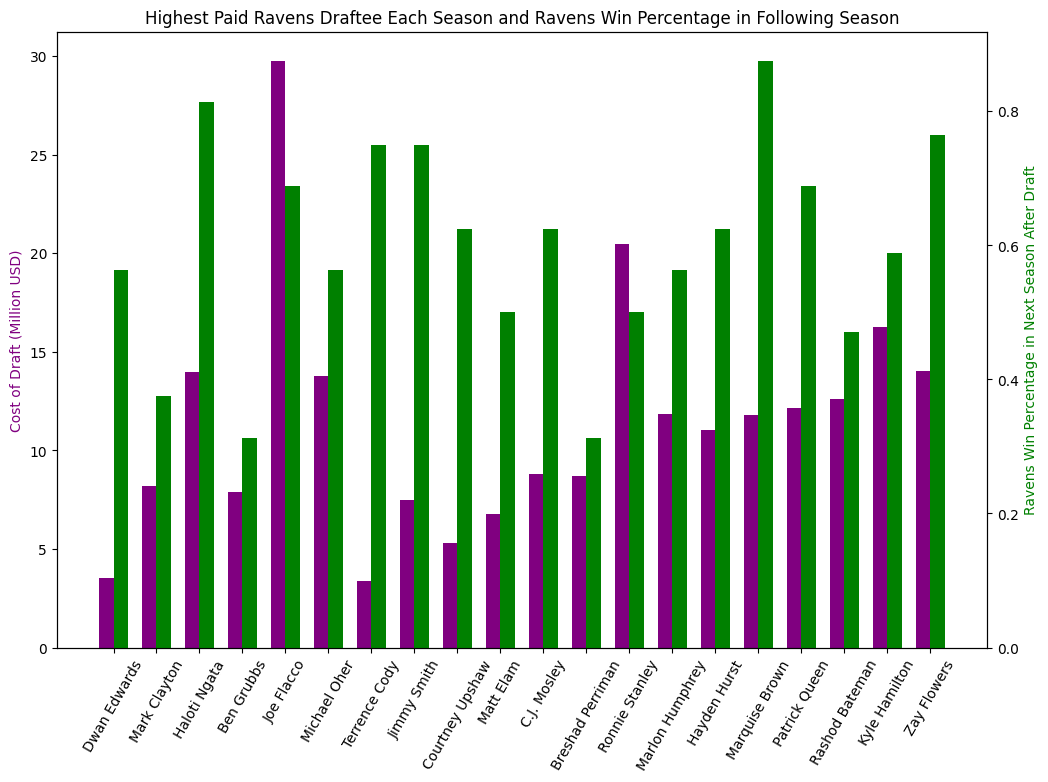

In [24]:
years = combined.Year.unique()
arr = []
Player = []
Price = []
Change = []
for year in years:
    curr = combined[combined['Year']==year]
    curr = curr.sort_values(by='Contract_Price', ascending=False)
    curr = curr.head(1)
    for index,row in curr.iterrows():
        arr.append(row)
        Player.append(row["Player"])
        Price.append(row["Contract_Price"]/1000000)
        Change.append(row["Win_Perc"])
    

indices = range(len(Player))
width = np.min(np.diff(indices))/3
plt.figure(figsize=(12,8))
plt.title("Highest Paid Ravens Draftee Each Season and Ravens Win Percentage in Following Season")
plt.bar(indices-width/2.,Price,width,color='purple',label='-Ymin')
plt.xticks(ticks = indices,rotation=60, labels = Player)
plt.ylabel('Cost of Draft (Million USD)',color='purple')

ax2 = plt.twinx()
ax2.bar(indices+width/2.,Change,width,color='green',label='Ymax')
plt.ylabel('Ravens Win Percentage in Next Season After Draft',color='green')
 

plt.show()